# Итоговая работа.

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.optimize import curve_fit
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [2]:
x = sym.Symbol('x')

In [3]:
# Задаем функцию:
f = (sym.tan(sym.sin(x) + sym.cos(2 * x+3)))**2
f

tan(sin(x) + cos(2*x + 3))**2

In [4]:
# Дифференцируем функцию по x
res = sym.diff(f, x)
res

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [5]:
# Вычисляем производную в точке x = 1
res.subs(x, 1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

## Задание 2

Дан объект в $2D$ пространстве

[[-100 -100    1]
 [   0  100    1]
 [ 100 -100    1]
 [-100 -100    1]]


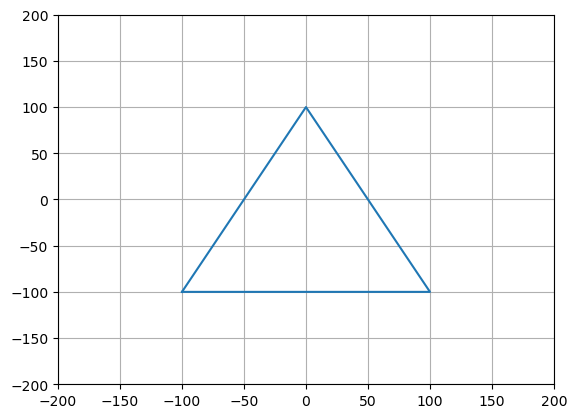

In [6]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
print(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.grid(True)

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


### Масштабирование

Уменьшим нашу фигуру в 2 раза:

In [7]:
# Масштабировать объект позволяет диагональная матрица:
B = np.diag([0.5, 0.5, 0.5])

In [8]:
# Измерим координаты объекта,
# умножив матрицу преобразования на транспонированную исходную матрицу:
res = B @ A.T
tt = res.T
tt

array([[-50. , -50. ,   0.5],
       [  0. ,  50. ,   0.5],
       [ 50. , -50. ,   0.5],
       [-50. , -50. ,   0.5]])

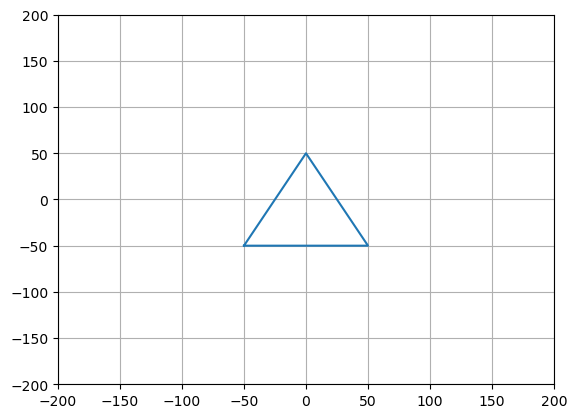

In [9]:
# Результат
A = np.array(tt)
x = A[:, 0]
y = A[:, 1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.grid(True) 

### Смещение

Сместим полученый объект вправо и вверх:

In [10]:
B = np.array([[1, 0, 100], [0, 1, 100], [0, 0, 1]])

In [11]:
res = B @ A.T
tt = res.T
tt

array([[  0. ,   0. ,   0.5],
       [ 50. , 100. ,   0.5],
       [100. ,   0. ,   0.5],
       [  0. ,   0. ,   0.5]])

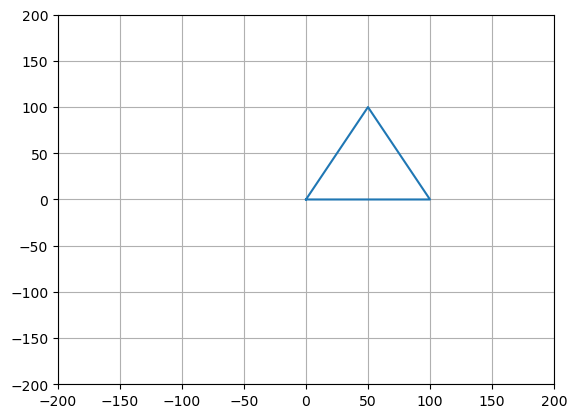

In [12]:
# Результат
A = np.array(tt)
x = A[:, 0]
y = A[:, 1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.grid(True) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [13]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [30]:
print(f"Собственные значеня матрицы m = {np.linalg.eigvals(m)}")

Собственные значеня матрицы m = [ 3. -1.]


In [31]:
res = np.linalg.eig(m)
res1 = np.transpose(res[1])
print(f"Первый собственный вектор матрицы m = {res1[0]}")
print(f"Второй собственный вектор матрицы m = {res1[1]}")

Первый собственный вектор матрицы m = [0.89442719 0.4472136 ]
Второй собственный вектор матрицы m = [-0.89442719  0.4472136 ]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [15]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [16]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

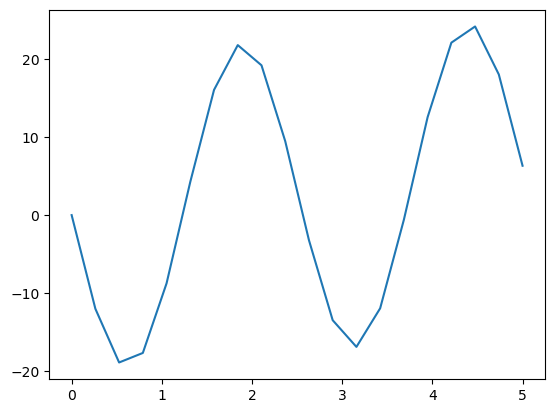

In [17]:
plt.plot(x, fx)
plt.show()

In [32]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [48]:
res, _ = curve_fit(f, x, fx, p0=(0, 1))

In [49]:
a, b = res[0], res[1]

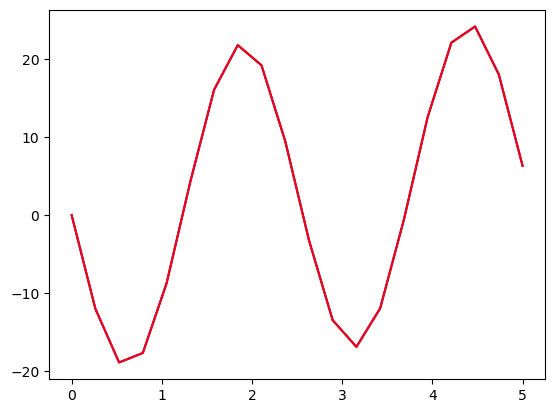

In [50]:
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, a, b), color='red')
plt.show;

In [51]:
print(error(res))

1.5365230368047378e-06


## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [20]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [82]:
cosine = cosine_similarity(raitings)
print(cosine)

[[1.         0.82602919 0.84921529 0.78340116 0.81917632 0.74118548
  0.72735828 0.80967522 0.91065982 0.86010776]
 [0.82602919 1.         0.81234325 0.84635337 0.87138052 0.82713107
  0.82629684 0.80026003 0.82526308 0.81968127]
 [0.84921529 0.81234325 1.         0.84669374 0.78394299 0.79097985
  0.67616223 0.76289552 0.82112077 0.91873051]
 [0.78340116 0.84635337 0.84669374 1.         0.69153409 0.78665792
  0.83274211 0.82934667 0.7770666  0.8588687 ]
 [0.81917632 0.87138052 0.78394299 0.69153409 1.         0.7764434
  0.78200468 0.81236869 0.87948477 0.84574789]
 [0.74118548 0.82713107 0.79097985 0.78665792 0.7764434  1.
  0.74011801 0.84451685 0.80622876 0.85514908]
 [0.72735828 0.82629684 0.67616223 0.83274211 0.78200468 0.74011801
  1.         0.82669174 0.81130044 0.79154718]
 [0.80967522 0.80026003 0.76289552 0.82934667 0.81236869 0.84451685
  0.82669174 1.         0.7981276  0.83682229]
 [0.91065982 0.82526308 0.82112077 0.7770666  0.87948477 0.80622876
  0.81130044 0.798127

In [168]:
cosine = cosine_similarity(raitings)

for i in range(1, 11):
    pair = ()
    k = 0
    for j in range(1, 11):
        if cosine[i - 1][j - 1] >= k and i != j:
            k = cosine[i - 1][j - 1]
            pair = (i, j)
    print(pair, k)

(1, 9) 0.9106598233573044
(2, 5) 0.8713805223930228
(3, 10) 0.9187305147356807
(4, 10) 0.8588686958710949
(5, 9) 0.8794847716076252
(6, 10) 0.8551490764118892
(7, 4) 0.8327421070557632
(8, 6) 0.8445168512565342
(9, 1) 0.9106598233573044
(10, 3) 0.9187305147356807
